In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

print("Column names in the dataset:", df.columns)

tnu = df['user_id'].nunique()
tni = df.iloc[:, 1:].shape[1]
missing_ratings_per_user = df.iloc[:, 1:].isnull().sum(axis=1)

user_with_2_missing = df.loc[missing_ratings_per_user == 2, 'user_id'].values
user_with_3_missing = df.loc[missing_ratings_per_user == 3, 'user_id'].values
user_with_5_missing = df.loc[missing_ratings_per_user == 5, 'user_id'].values

ratings_per_product = df.iloc[:, 1:].notna().sum(axis=0)
missing_ratings_percentage_per_item = df.iloc[:, 1:].isnull().mean(axis=0) * 100

item_with_4_percent_missing = missing_ratings_percentage_per_item[missing_ratings_percentage_per_item == 4].index
item_with_10_percent_missing = missing_ratings_percentage_per_item[missing_ratings_percentage_per_item == 10].index

active_user_id = 'User1'
active_user_ratings = df[df['user_id'] == active_user_id].iloc[:, 1:]

common_users = []
co_rated_items_counts = []

for user in df['user_id'].unique():
    if user != active_user_id:
        other_user_ratings = df[df['user_id'] == user].iloc[:, 1:]
        common_items = active_user_ratings[active_user_ratings.notna()].index.intersection(
            other_user_ratings[other_user_ratings.notna()].index)
        if len(common_items) > 0:
            common_users.append(user)
            co_rated_items_counts.append(len(common_items))

no_common_users = len(common_users)
no_coRated_items = sum(co_rated_items_counts)

print("Total number of unique users (tnu):", tnu)
print("Total number of unique items (tni):", tni)
print("Ratings per product:")
print(ratings_per_product)
print("User with 2 missing ratings:", user_with_2_missing)
print("User with 3 missing ratings:", user_with_3_missing)
print("User with 5 missing ratings:", user_with_5_missing)
print("Item with 4% missing ratings:", item_with_4_percent_missing)
print("Item with 10% missing ratings:", item_with_10_percent_missing)


Column names in the dataset: Index(['user_id', 'B07TDSJZMR', 'B08637FWWF', 'B07KJVGNN5', 'B007HY7GC2',
       'B08KYJLF5T', 'B09GBMG83Z', 'B09FKT5PQ9', 'B08THJD1MH', 'B08FCQML37',
       'B08GYM3HVP'],
      dtype='object')
Total number of unique users (tnu): 100
Total number of unique items (tni): 10
Ratings per product:
B07TDSJZMR     6
B08637FWWF     9
B07KJVGNN5    96
B007HY7GC2     4
B08KYJLF5T    11
B09GBMG83Z    90
B09FKT5PQ9     3
B08THJD1MH     8
B08FCQML37     3
B08GYM3HVP     2
dtype: int64
User with 2 missing ratings: ['AETE7Y3DZT6BLMWA6U27ADJDZ4LA']
User with 3 missing ratings: ['AEMJ2EG5ODOCYUTI54NBXZHDJGSQ']
User with 5 missing ratings: ['AFSKPY37N3C43SOI5IEXEK5JSIYA']
Item with 4% missing ratings: Index(['B07KJVGNN5'], dtype='object')
Item with 10% missing ratings: Index(['B09GBMG83Z'], dtype='object')


In [2]:
print("Column names in the dataset:", df.columns)
product_column = 'your_actual_column_name_here'


Column names in the dataset: Index(['user_id', 'B07TDSJZMR', 'B08637FWWF', 'B07KJVGNN5', 'B007HY7GC2',
       'B08KYJLF5T', 'B09GBMG83Z', 'B09FKT5PQ9', 'B08THJD1MH', 'B08FCQML37',
       'B08GYM3HVP'],
      dtype='object')


In [4]:
import pandas as pd


data = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

user_column = 'user_id'
product_columns = data.columns[1:]  

missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'user_id'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'user_id'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'user_id'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

co_rating_stats = []

for user in active_users:
    
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
       
        no_common_users = 0
        no_coRated_items = 0
    else:
        
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]  
        
        
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)]  
        
        
        no_common_users = co_rated_items[user_column].nunique()  
        no_coRated_items = len(user_rated_items)  
    
    
    co_rating_stats.append([no_common_users, no_coRated_items])

co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])

co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)

print("\nSorted Co-Rating Statistics:")
print(co_rating_df_sorted)


Sorted Co-Rating Statistics:
   No_common_users  No_coRated_items
0              100                 8
1              100                 7
2               91                 5


In [5]:
import pandas as pd

data = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

user_column = 'user_id'
product_columns = data.columns[1:]

missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'user_id'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'user_id'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'user_id'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

co_rating_stats = []

for user in active_users:
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
        no_common_users = 0
        no_coRated_items = 0
    else:
        user_rated_items = user_data.dropna(axis=1, how='all').columns[1:]
        co_rated_items = data[data[user_rated_items].notna().any(axis=1)]
        no_common_users = co_rated_items[user_column].nunique()
        no_coRated_items = len(user_rated_items)
    
    co_rating_stats.append([no_common_users, no_coRated_items])

co_rating_df = pd.DataFrame(co_rating_stats, columns=['No_common_users', 'No_coRated_items'])
co_rating_df_sorted = co_rating_df.sort_values(by='No_common_users', ascending=False)
sorted_array = co_rating_df_sorted.values

print("\nSorted 2-D Array (No_common_users in descending order, No_coRated_items in corresponding order):")
print(sorted_array)



Sorted 2-D Array (No_common_users in descending order, No_coRated_items in corresponding order):
[[100   8]
 [100   7]
 [ 91   5]]


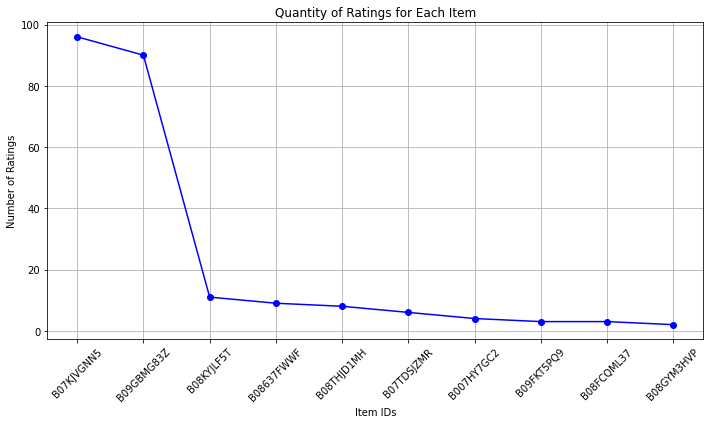

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

ratings_count = df.iloc[:, 1:].notnull().sum(axis=0)  


ratings_count = ratings_count.sort_values(ascending=False)


plt.figure(figsize=(10, 6))
plt.plot(ratings_count.index, ratings_count.values, marker='o', linestyle='-', color='b')
plt.title('Quantity of Ratings for Each Item')
plt.xlabel('Item IDs')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()


In [7]:
import pandas as pd

data = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

user_column = 'user_id'
product_columns = data.columns[1:]

missing_ratings_per_user = data.iloc[:, 1:].isnull().sum(axis=1)
user_with_2_missing = data.loc[missing_ratings_per_user == 2, 'user_id'].values
user_with_3_missing = data.loc[missing_ratings_per_user == 3, 'user_id'].values
user_with_5_missing = data.loc[missing_ratings_per_user == 5, 'user_id'].values

active_users = user_with_2_missing.tolist() + user_with_3_missing.tolist() + user_with_5_missing.tolist()

thresholds = {}

for user in active_users:
    user_data = data[data[user_column] == user]
    
    if user_data.empty:
        thresholds[user] = 0
        continue
    
    user_rated_items = user_data.iloc[0, 1:].dropna().index
    
    if user_rated_items.empty:
        thresholds[user] = 0
        continue
    
    co_ratings = []
    for _, other_user_data in data.iterrows():
        if other_user_data[user_column] == user:
            continue
        
        other_user_rated_items = other_user_data[user_rated_items].dropna()
        co_rated_count = len(other_user_rated_items)
        total_items_rated_by_user = len(user_rated_items)
        
        if total_items_rated_by_user > 0:
            co_rated_percentage = (co_rated_count / total_items_rated_by_user) * 100
        else:
            co_rated_percentage = 0
        
        if co_rated_percentage >= 30:
            co_ratings.append(other_user_data[user_column])
    
    thresholds[user] = len(set(co_ratings))

print("Thresholds (ß) for each active user:")
for user, beta in thresholds.items():
    print(f"User {user}: ß = {beta}")


Thresholds (ß) for each active user:
User AETE7Y3DZT6BLMWA6U27ADJDZ4LA: ß = 25
User AEMJ2EG5ODOCYUTI54NBXZHDJGSQ: ß = 23
User AFSKPY37N3C43SOI5IEXEK5JSIYA: ß = 10


In [8]:
import pandas as pd

with open('results.txt', 'w') as f:
    f.write("Basic Statistics:\n")
    stats = {
        'Total number of unique users (tnu)': tnu,
        'Total number of unique items (tni)': tni,
        'Ratings per product': ratings_per_product.to_dict(),
        'Users with 2 missing ratings': user_with_2_missing,
        'Users with 3 missing ratings': user_with_3_missing,
        'Users with 5 missing ratings': user_with_5_missing,
        'Items with 4% missing ratings': item_with_4_percent_missing.tolist(),
        'Items with 10% missing ratings': item_with_10_percent_missing.tolist()
    }
    for key, value in stats.items():
        f.write(f"{key}: {value}\n")
    f.write("\n")

    f.write("Co-rating Statistics:\n")
    f.write(co_rating_df_sorted.to_string(index=False))
    f.write("\n\n")

    f.write("Sorted Co-rating Array:\n")
    f.write(pd.DataFrame(sorted_array, columns=['No_common_users', 'No_coRated_items']).to_string(index=False))
    f.write("\n\n")

    f.write("Item Ratings Curve Data:\n")
    f.write(ratings_count.to_string(index=False))
    f.write("\n\n")

    f.write("Thresholds for Active Users (ß):\n")
    f.write(pd.DataFrame(list(thresholds.items()), columns=['User', 'Threshold ß']).to_string(index=False))
    f.write("\n")


In [9]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Load the dataset
user_item_matrix = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

# Clean column names and set 'user_id' as the index
user_item_matrix.columns = user_item_matrix.columns.str.strip()
user_item_matrix.set_index('user_id', inplace=True)

# List of active users
active_users = [
    'AETE7Y3DZT6BLMWA6U27ADJDZ4LA', 
    'AEMJ2EG5ODOCYUTI54NBXZHDJGSQ', 
    'AFSKPY37N3C43SOI5IEXEK5JSIYA'
]

# Rearrange the matrix to place active users at the top
user_item_matrix_active = user_item_matrix.loc[
    active_users + [user for user in user_item_matrix.index if user not in active_users]
]

# Compute cosine similarity
cosine_sim = cosine_similarity(user_item_matrix_active.fillna(0))

# Display the full cosine similarity matrix
print("Cosine Similarity Matrix:\n", cosine_sim)

# Extract and display similarity scores for each active user
for i, user in enumerate(active_users):
    print(f"\nSimilarities of {user} with all other users:")
    similarity_scores = cosine_sim[i]
    similarity_df = pd.DataFrame(similarity_scores, index=user_item_matrix_active.index, columns=['Similarity'])
    print(similarity_df.sort_values(by='Similarity', ascending=False))


Cosine Similarity Matrix:
 [[1.         0.80161343 0.57232262 ... 0.60955692 0.61300882 0.60955692]
 [0.80161343 1.         0.48145555 ... 0.4330127  0.46948553 0.4330127 ]
 [0.57232262 0.48145555 1.         ... 0.37062466 0.41931393 0.37062466]
 ...
 [0.60955692 0.4330127  0.37062466 ... 1.         0.98994949 1.        ]
 [0.61300882 0.46948553 0.41931393 ... 0.98994949 1.         0.98994949]
 [0.60955692 0.4330127  0.37062466 ... 1.         0.98994949 1.        ]]

Similarities of AETE7Y3DZT6BLMWA6U27ADJDZ4LA with all other users:
                              Similarity
user_id                                 
AETE7Y3DZT6BLMWA6U27ADJDZ4LA    1.000000
AEMJ2EG5ODOCYUTI54NBXZHDJGSQ    0.801613
AE3TASYGLHHRHUJUDFTKFDMWFIYA    0.778142
AFKZENTNBQ7A7V7UXW5JJI6UGRYQ    0.777854
AG3ZLSFL6WEHCXA2SETWSPPDGTVQ    0.766613
...                                  ...
AF7J5A2ME55LSCRVQWXB3BKE7CHQ    0.383131
AGQSSZPF5DTU56OIYEZVVKTMKJIQ    0.383131
AFAIJYOUO3NAWLBDIKTQSC3DASWA    0.383131
AEVWAM3YWN

In [10]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

user_item_matrix = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")


user_item_matrix.columns = user_item_matrix.columns.str.strip()


user_item_matrix.set_index('user_id', inplace=True)


active_users = ['AETE7Y3DZT6BLMWA6U27ADJDZ4LA', 'AEMJ2EG5ODOCYUTI54NBXZHDJGSQ', 'AFSKPY37N3C43SOI5IEXEK5JSIYA']


user_item_matrix_active = user_item_matrix.loc[active_users + [user for user in user_item_matrix.index if user not in active_users]]


cosine_sim = cosine_similarity(user_item_matrix_active.fillna(0))


print("Cosine Similarity Matrix:\n", cosine_sim)


def get_top_n_closest_users(similarity_matrix, n=20):
    top_n_users = {}
    for i, user in enumerate(active_users):
        similarity_scores = similarity_matrix[i]
        similarity_df = pd.DataFrame(similarity_scores, index=user_item_matrix_active.index, columns=['Similarity'])
        
    
        sorted_similarity_df = similarity_df.sort_values(by='Similarity', ascending=False)
        top_n_users[user] = sorted_similarity_df.iloc[1:int(len(sorted_similarity_df) * (n / 100))]  
    
    return top_n_users


top_20_percent_users = get_top_n_closest_users(cosine_sim, n=20)

for user, closest_users in top_20_percent_users.items():
    print(f"\nTop 20% closest users to {user}:")
    print(closest_users)


Cosine Similarity Matrix:
 [[1.         0.80161343 0.57232262 ... 0.60955692 0.61300882 0.60955692]
 [0.80161343 1.         0.48145555 ... 0.4330127  0.46948553 0.4330127 ]
 [0.57232262 0.48145555 1.         ... 0.37062466 0.41931393 0.37062466]
 ...
 [0.60955692 0.4330127  0.37062466 ... 1.         0.98994949 1.        ]
 [0.61300882 0.46948553 0.41931393 ... 0.98994949 1.         0.98994949]
 [0.60955692 0.4330127  0.37062466 ... 1.         0.98994949 1.        ]]

Top 20% closest users to AETE7Y3DZT6BLMWA6U27ADJDZ4LA:
                              Similarity
user_id                                 
AEMJ2EG5ODOCYUTI54NBXZHDJGSQ    0.801613
AE3TASYGLHHRHUJUDFTKFDMWFIYA    0.778142
AFKZENTNBQ7A7V7UXW5JJI6UGRYQ    0.777854
AG3ZLSFL6WEHCXA2SETWSPPDGTVQ    0.766613
AGBOGNMAG3UCA6B4Z6VT62DVNOIA    0.753056
AFXF3EGQTQDXMRLDWFU7UBFQZB7Q    0.730286
AHVWKBFOVXQV6653O4XGCKOB6YVA    0.679861
AFD6OGB6AY4YPKN62LCTXGYR7KJA    0.666945
AEKGBJHGLLCKCRL3KMFZ4JUKVNSQ    0.664523
AG2UEDPK43QC5AU6HZTCBA

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

user_item_matrix = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

user_item_matrix.columns = user_item_matrix.columns.str.strip()

user_item_matrix.set_index('user_id', inplace=True)

active_users = ['AETE7Y3DZT6BLMWA6U27ADJDZ4LA', 'AEMJ2EG5ODOCYUTI54NBXZHDJGSQ', 'AFSKPY37N3C43SOI5IEXEK5JSIYA']


thresholds = {
    'AETE7Y3DZT6BLMWA6U27ADJDZ4LA': 25,
    'AEMJ2EG5ODOCYUTI54NBXZHDJGSQ': 23,
    'AFSKPY37N3C43SOI5IEXEK5JSIYA': 10
}


user_item_matrix_active = user_item_matrix.loc[active_users + [user for user in user_item_matrix.index if user not in active_users]]


cosine_sim = cosine_similarity(user_item_matrix_active.fillna(0))


def get_top_n_closest_users(similarity_matrix, n=20, use_discounted=False, thresholds=None):
    top_n_users = {}
    for i, user in enumerate(active_users):
        similarity_scores = similarity_matrix[i]
        similarity_df = pd.DataFrame(similarity_scores, index=user_item_matrix_active.index, columns=['Similarity'])

        
        if use_discounted:
            threshold = thresholds.get(user, 0)
            similarity_df['Discounted Similarity'] = similarity_df['Similarity'].apply(lambda x: x * (1 if x >= threshold else 0))
            similarity_df = similarity_df.sort_values(by='Discounted Similarity', ascending=False)
        else:
            similarity_df = similarity_df.sort_values(by='Similarity', ascending=False)


        top_n_users[user] = similarity_df.iloc[1:int(len(similarity_df) * (n / 100))]  

    return top_n_users


top_20_percent_users = get_top_n_closest_users(cosine_sim, n=60)


def predict_ratings(user, top_n_users, user_item_matrix, similarity_matrix, use_discounted=False, thresholds=None):
    predictions = {}

    
    unrated_items = user_item_matrix.columns[user_item_matrix.loc[user].isna()]
    if unrated_items.empty:
        print(f"{user} has no unrated items.")
        return predictions  

    
    for item in unrated_items:
        numerator = 0
        denominator = 0
        for neighbor, similarity in top_n_users[user].iterrows():
            if not pd.isna(user_item_matrix.loc[neighbor, item]):
                
                numerator += similarity['Similarity'] * user_item_matrix.loc[neighbor, item]
                denominator += abs(similarity['Similarity'])

    
        if denominator > 0:
            predictions[item] = numerator / denominator
        else:
            predictions[item] = np.nan  
    return predictions


def classify_predictions(predictions, threshold=3):
    classification = {}
    for item, rating in predictions.items():
        if pd.notna(rating):
            classification[item] = 'like' if rating >= threshold else 'dislike'
    return classification


print("\n--- Predictions using Original Similarity ---\n")
for user in active_users:
    print(f"\nPredictions for {user}:")
    predictions = predict_ratings(user, top_20_percent_users, user_item_matrix, cosine_sim)
    classifications = classify_predictions(predictions)
    for item, pred in predictions.items():
        if pd.notna(pred):
            print(f"Item: {item}, Predicted Rating: {pred:.2f}, Classification: {classifications[item]}")


top_20_percent_users_discounted = get_top_n_closest_users(cosine_sim, n=60, use_discounted=True, thresholds=thresholds)


print("\n--- Predictions using Discounted Similarity ---\n")
for user in active_users:
    print(f"\nPredictions for {user}:")
    predictions = predict_ratings(user, top_20_percent_users_discounted, user_item_matrix, cosine_sim, use_discounted=True, thresholds=thresholds)
    classifications = classify_predictions(predictions)
    for item, pred in predictions.items():
        if pd.notna(pred):
            print(f"Item: {item}, Predicted Rating: {pred:.2f}, Classification: {classifications[item]}")



--- Predictions using Original Similarity ---


Predictions for AETE7Y3DZT6BLMWA6U27ADJDZ4LA:
Item: B08FCQML37, Predicted Rating: 5.00, Classification: like
Item: B08GYM3HVP, Predicted Rating: 3.00, Classification: like

Predictions for AEMJ2EG5ODOCYUTI54NBXZHDJGSQ:
Item: B09FKT5PQ9, Predicted Rating: 3.38, Classification: like
Item: B08FCQML37, Predicted Rating: 2.40, Classification: dislike
Item: B08GYM3HVP, Predicted Rating: 3.00, Classification: like

Predictions for AFSKPY37N3C43SOI5IEXEK5JSIYA:
Item: B07TDSJZMR, Predicted Rating: 3.96, Classification: like
Item: B08637FWWF, Predicted Rating: 3.00, Classification: dislike
Item: B07KJVGNN5, Predicted Rating: 2.76, Classification: dislike
Item: B007HY7GC2, Predicted Rating: 2.84, Classification: dislike
Item: B08KYJLF5T, Predicted Rating: 2.79, Classification: dislike

--- Predictions using Discounted Similarity ---


Predictions for AETE7Y3DZT6BLMWA6U27ADJDZ4LA:
Item: B08FCQML37, Predicted Rating: 2.00, Classification: dislike
Ite

In [12]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

user_item_matrix = pd.read_csv(r"C:\Users\User\Desktop\user_item_matrix.csv")

user_item_matrix.columns = user_item_matrix.columns.str.strip()

user_item_matrix.set_index('user_id', inplace=True)


active_users = ['AETE7Y3DZT6BLMWA6U27ADJDZ4LA', 'AEMJ2EG5ODOCYUTI54NBXZHDJGSQ', 'AFSKPY37N3C43SOI5IEXEK5JSIYA']

user_means = user_item_matrix.mean(axis=1)  
mean_centered_matrix = user_item_matrix.sub(user_means, axis=0)  
mean_centered_matrix_filled = mean_centered_matrix.fillna(0)

filtered_matrix = mean_centered_matrix_filled.loc[
    active_users + [user for user in user_item_matrix.index if user not in active_users]
]


cosine_sim = cosine_similarity(filtered_matrix)


cosine_sim_df = pd.DataFrame(cosine_sim, index=filtered_matrix.index, columns=filtered_matrix.index)


top_20_percent_users = {}

for user in active_users:
   
    similarity_scores = cosine_sim_df.loc[user]
    
    similarity_scores = similarity_scores.drop(user)
   
    sorted_scores = similarity_scores.sort_values(ascending=False)
    
   
    top_20_count = int(np.ceil(len(sorted_scores) * 0.2))
    
    top_users = sorted_scores.head(top_20_count)
    
    top_20_percent_users[user] = top_users
   
    print(f"\nSimilarities of {user} with all other users:")
    print(similarity_scores)

    print(f"\nTop 20% closest users to {user}:")
    print(top_users)




Similarities of AETE7Y3DZT6BLMWA6U27ADJDZ4LA with all other users:
user_id
AEMJ2EG5ODOCYUTI54NBXZHDJGSQ   -0.018248
AFSKPY37N3C43SOI5IEXEK5JSIYA    0.148418
AFKZENTNBQ7A7V7UXW5JJI6UGRYQ    0.193122
AEVWAM3YWN5URJVJIZZ6XPD2MKIA   -0.615967
AHSPLDNW5OOUK2PLH7GXLACFBZNQ   -0.167248
                                  ...   
AEKLWIFD6GVHWJKIC4QDCDYRNYKQ   -0.167248
AG3ZLSFL6WEHCXA2SETWSPPDGTVQ    0.096561
AFLX66DKF6R3H6OEOC3TIVAYXZIQ    0.000000
AFQ7WYW4KSH4VI5OVXCP2GV6PBRA    0.167248
AETGCWXC47MSMK6B2TLZ44KCFJZQ    0.000000
Name: AETE7Y3DZT6BLMWA6U27ADJDZ4LA, Length: 99, dtype: float64

Top 20% closest users to AETE7Y3DZT6BLMWA6U27ADJDZ4LA:
user_id
AFCYUFW3NQ37UQXYVWL3LN4LAKLQ    0.427890
AEZGPLOYTSAPR3DHZKKXEFPAXUAA    0.386244
AEQAYV7RXZEBXMQIQPL6KCT2CFWQ    0.386244
AG6SNHIVEFMJIXCLZWKTGEOV5ZBQ    0.253472
AFKZENTNBQ7A7V7UXW5JJI6UGRYQ    0.193122
AFZUK3MTBIBEDQOPAK3OATUOUKLA    0.193122
AE3TASYGLHHRHUJUDFTKFDMWFIYA    0.193122
AHEJ5LC7BSEADCIZQQQPZPVWOLCA    0.167248
AEIPJBAN7A55Q5DFFP